<a href="https://colab.research.google.com/github/quanganh1999/DevC-Assignments/blob/master/Week4_TED_Talks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Team 4 - TED Talks

![](https://psmarketingimages.s3.amazonaws.com/blog/wp-content/uploads/2017/04/23103819/TED-Talks-for-Small-Business-and-Entrepreneurs.jpg)

_For more information about the dataset, read [here](https://www.kaggle.com/rounakbanik/ted-talks)._

## Your tasks
- Name your team!
- Read the source and do some quick research to understand more about the dataset and its topic
- Clean the data
- Perform Exploratory Data Analysis on the dataset
- Analyze the data more deeply and extract insights
- Visualize your analysis on Google Data Studio
- Present your works in front of the class and guests next Monday

## Submission Guide
- Create a Github repository for your project
- Upload the dataset (.csv file) and the Jupyter Notebook to your Github repository. In the Jupyter Notebook, **include the link to your Google Data Studio report**.
- Submit your works through this [Google Form](https://forms.gle/oxtXpGfS8JapVj3V8).

## Tips for Data Cleaning, Manipulation & Visualization
- Here are some of our tips for Data Cleaning, Manipulation & Visualization. [Click here](https://hackmd.io/cBNV7E6TT2WMliQC-GTw1A)

_____________________________

## Some Hints for This Dataset:
- The `ratings` column is in dictionary format. How should we handle them?
- Same for `related_talks` and `tags` column
- Can you find the `year` of the talks?
- And more...

## Import libraries and dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime
from collections import Counter
import ast
import re
from PIL import Image
from wordcloud import WordCloud
import requests
from io import BytesIO
import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
import os
from os import path

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
%cd drive/My\ Drive

/content/drive/My Drive


In [5]:
df = pd.read_csv('ted.csv')
df.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


Check number of rows and column in ted_main dataset:

In [6]:
df.shape

(2550, 17)

Identify missing values within the dataset:

In [7]:
df.isnull().sum()

comments              0
description           0
duration              0
event                 0
film_date             0
languages             0
main_speaker          0
name                  0
num_speaker           0
published_date        0
ratings               0
related_talks         0
speaker_occupation    6
tags                  0
title                 0
url                   0
views                 0
dtype: int64

The dataset has no any missing value

View basic statistical details of ted_main dataset:

In [8]:
df.describe()

,comments,duration,film_date,languages,num_speaker,published_date,views
count,2550.000000,2550.000000,2.550000e+03,2550.000000,2550.000000,2.550000e+03,2.550000e+03
mean,191.562353,826.510196,1.321928e+09,27.326275,1.028235,1.343525e+09,1.698297e+06
std,282.315223,374.009138,1.197391e+08,9.563452,0.207705,9.464009e+07,2.498479e+06
min,2.000000,135.000000,7.464960e+07,0.000000,1.000000,1.151367e+09,5.044300e+04
25%,63.000000,577.000000,1.257466e+09,23.000000,1.000000,1.268463e+09,7.557928e+05
50%,118.000000,848.000000,1.333238e+09,28.000000,1.000000,1.340935e+09,1.124524e+06
75%,221.750000,1046.750000,1.412964e+09,33.000000,1.000000,1.423432e+09,1.700760e+06
max,6404.000000,5256.000000,1.503792e+09,72.000000,5.000000,1.506092e+09,4.722711e+07


Identify the datatype of each feature:

In [9]:
df.dtypes

comments               int64
description           object
duration               int64
event                 object
film_date              int64
languages              int64
main_speaker          object
name                  object
num_speaker            int64
published_date         int64
ratings               object
related_talks         object
speaker_occupation    object
tags                  object
title                 object
url                   object
views                  int64
dtype: object

## Data Exploration

<li><b>name</b>: The official name of the TED Talk. Includes the title and the speaker. <br>
<li><b>title</b>: The title of the talk <br>
<li><b>description</b>: A blurb of what the talk is about. <br>
<li><b>main_speaker</b>: The first named speaker of the talk. <br>
<li><b>speaker_occupation</b>: The occupation of the main speaker. <br>
<li><b>num_speaker</b>: The number of speakers in the talk. <br>
<li><b>duration</b>: The duration of the talk in seconds. <br>
<li><b>event</b>: The TED/TEDx event where the talk took place. <br>
<li><b>film_date</b>: The Unix timestamp of the filming. <br>
<li><b>published_date</b>: The Unix timestamp for the publication of the talk on TED.com <br>
<li><b>comments</b>: The number of first level comments made on the talk. <br>
<li><b>tags</b>: The themes associated with the talk. <br>
<li><b>languages</b>: The number of languages in which the talk is available. <br>
<li><b>ratings</b>: A stringified dictionary of the various ratings given to the talk (inspiring, fascinating, jaw dropping, etc.) <br>
<li><b>related_talks</b>: A list of dictionaries of recommended talks to watch next. <br>
<li><b>url</b>: The URL of the talk. <br>
<li><b>views</b>: The number of views on the talk. <br>

Convert film_date and published_date into datetime format

In [10]:
df['film_date'] = df['film_date'].apply(lambda x: datetime.date.fromtimestamp(int(x)).strftime('%Y-%m-%d %H:%M:%S'))
df['published_date'] = df['published_date'].apply(lambda x: datetime.date.fromtimestamp(int(x)).strftime('%Y-%m-%d %H:%M:%S'))

In [11]:
df.sample(5)

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
2039,57,Jim Simons was a mathematician and cryptograph...,1383,TED2015,2015-03-17 00:00:00,23,Jim Simons,Jim Simons: The mathematician who cracked Wall...,1,2015-09-03 00:00:00,"[{'id': 10, 'name': 'Inspiring', 'count': 246}...","[{'id': 1688, 'hero': 'https://pe.tedcdn.com/i...","Philanthropist, mathematician","['human origins', 'investment', 'math', 'phila...",The mathematician who cracked Wall Street,https://www.ted.com/talks/jim_simons_a_rare_in...,1705702
510,110,Lewis Pugh talks about his record-breaking swi...,1133,TEDGlobal 2009,2009-09-09 00:00:00,23,Lewis Pugh,Lewis Pugh: How I swam the North Pole,1,2009-09-09 00:00:00,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 2...","[{'id': 928, 'hero': 'https://pe.tedcdn.com/im...",Coldwater swimmer,"['adventure', 'climate change', 'science', 'sp...",How I swam the North Pole,https://www.ted.com/talks/lewis_pugh_swims_the...,689476
1406,200,Imagine you're a shipwrecked sailor adrift in ...,690,TEDGlobal 2012,2012-06-28 00:00:00,30,Karen Thompson Walker,Karen Thompson Walker: What fear can teach us,1,2013-01-02 00:00:00,"[{'id': 9, 'name': 'Ingenious', 'count': 113},...","[{'id': 1379, 'hero': 'https://pe.tedcdn.com/i...",Novelist,"['creativity', 'death', 'entertainment', 'fear...",What fear can teach us,https://www.ted.com/talks/karen_thompson_walke...,1951290
190,105,Virtuoso Pamelia Kurstin performs and discusse...,1151,TED2002,2002-02-02 00:00:00,24,Pamelia Kurstin,Pamelia Kurstin: The untouchable music of the ...,1,2008-02-13 00:00:00,"[{'id': 7, 'name': 'Funny', 'count': 129}, {'i...","[{'id': 103, 'hero': 'https://pe.tedcdn.com/im...",Theremin player,"['live music', 'music', 'performance', 'techno...",The untouchable music of the theremin,https://www.ted.com/talks/pamelia_kurstin_play...,1687185
1597,148,"In this funny and thought-provoking talk, Jane...",842,TEDCity2.0,2013-09-20 00:00:00,25,Janette Sadik-Khan,Janette Sadik-Khan: New York's streets? Not so...,1,2013-10-08 00:00:00,"[{'id': 22, 'name': 'Fascinating', 'count': 14...","[{'id': 789, 'hero': 'https://pe.tedcdn.com/im...",City transportation expert,"['architecture', 'cities', 'design', 'infrastr...",New York's streets? Not so mean any more,https://www.ted.com/talks/janette_sadik_khan_n...,925046


In [12]:
df['film_date'], df['published_date'] = pd.to_datetime(df['film_date']), pd.to_datetime(df['published_date'])

### How many Ted Talks have been filmed and published?

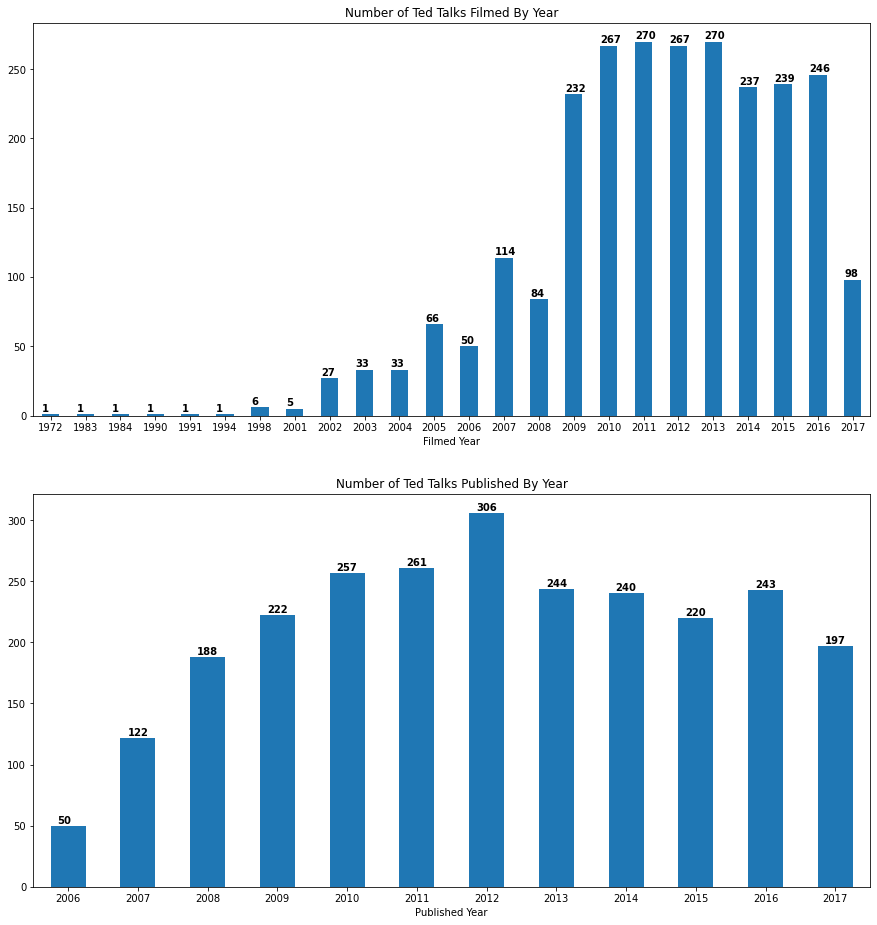

In [13]:
#Number of ted talks published or filmed by year
pub_year=df['published_date'].dt.year.value_counts().sort_index()
film_year=df['film_date'].dt.year.value_counts().sort_index()

fig, (ax1, ax2) = plt.subplots(2,1,figsize=(15,6))
film_year.plot(kind='bar', ax=ax1)
pub_year.plot(kind='bar', ax=ax2)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=0)
ax1.set_xlabel('Filmed Year')
ax2.set_xlabel('Published Year')
for i, v in enumerate(film_year):
    ax1.text(i-0.25,v+2, str(v),color='black',fontweight='bold')
for i, v in enumerate(pub_year):
    ax2.text(i-0.15,v+2, str(v),color='black',fontweight='bold')
ax1.title.set_text('Number of Ted Talks Filmed By Year')
ax2.title.set_text('Number of Ted Talks Published By Year')
plt.subplots_adjust(bottom=0, top=2)
plt.show()

<li>It can be observed that the ted talks videos starts filming since 1972, but only start to publish at 2006. <br>
<li>Number of filmed ted talks increased drastically since 2009.<br>
<li>Most ted talks videos were published on year 2012.

### Which Ted Talks videos have the most first level comments?

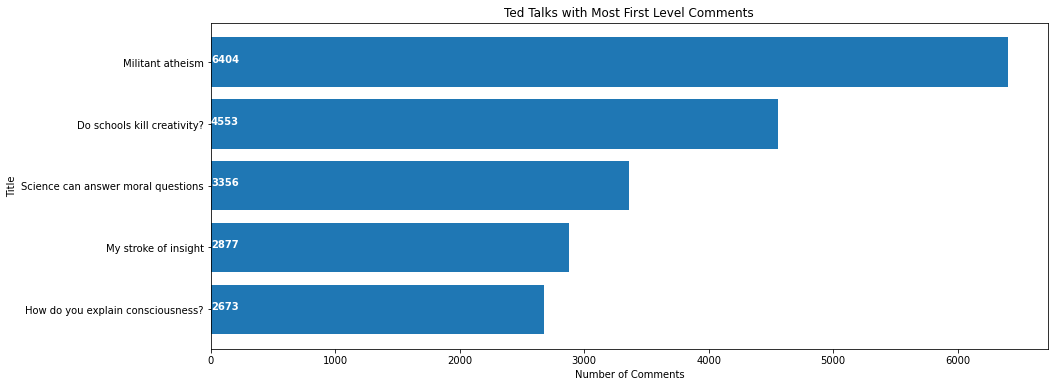

           main_speaker  ... comments
2545     David Chalmers  ...     2673
2546  Jill Bolte Taylor  ...     2877
2547         Sam Harris  ...     3356
2548       Ken Robinson  ...     4553
2549    Richard Dawkins  ...     6404

[5 rows x 4 columns]


In [14]:
# Which video received greater number of first level comments
df_comm = df[['main_speaker','title','published_date','comments']].sort_values(by=['comments']).reset_index(drop=True)
fig,ax=plt.subplots(figsize=(15,6))
plt.barh(df_comm['title'].tail(), df_comm['comments'].tail())
for i, v in enumerate(df_comm['comments'].tail()):
    ax.text(v/v,i, str(v),color='white',fontweight='bold')
plt.title('Ted Talks with Most First Level Comments')
plt.xlabel('Number of Comments')
plt.ylabel('Title')
plt.show()

print(df_comm.tail())

"Militant atheism" shows highest first level comments followed by "Do schools kill creativity?". <br>
These 2 ted talks videos were published since year 2006 and year 2007 respectively, in which they have been published for longer years compared to the other ted talks with higher first level comments. <br>
It is worth noting that "How do you explain consciousness?" have received 2673 first level comments since publishing on year 2014 until year 2017.

### What are the Top 10 Ted Talks events with most published videos?

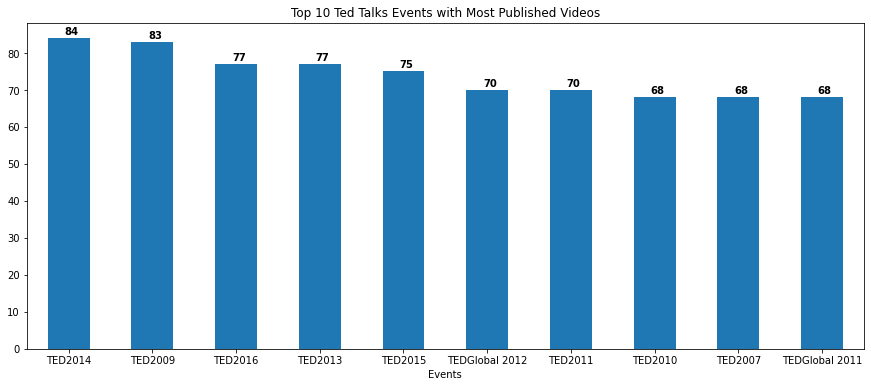

In [16]:
# Top 10 ted talk events with most published videos
top10_event = df['event'].value_counts().sort_values(ascending=False).head(10)
fig, ax=plt.subplots(figsize=(15,6))
top10_event.plot(kind='bar')
plt.xlabel('Events')
for i, v in enumerate(top10_event):
    ax.text(i-0.05,v+1, str(v),color='black',fontweight='bold')
plt.xticks(rotation=0)
plt.title('Top 10 Ted Talks Events with Most Published Videos')
plt.show()

More Ted Talks videos were published on TED events rather than TEDGlobal events.<br>
Although year 2012 has the higher published Ted Talks videos with 306 counts, but there is just a single event in 2012 fitted into Top 10 Ted Talks events with most published videos.

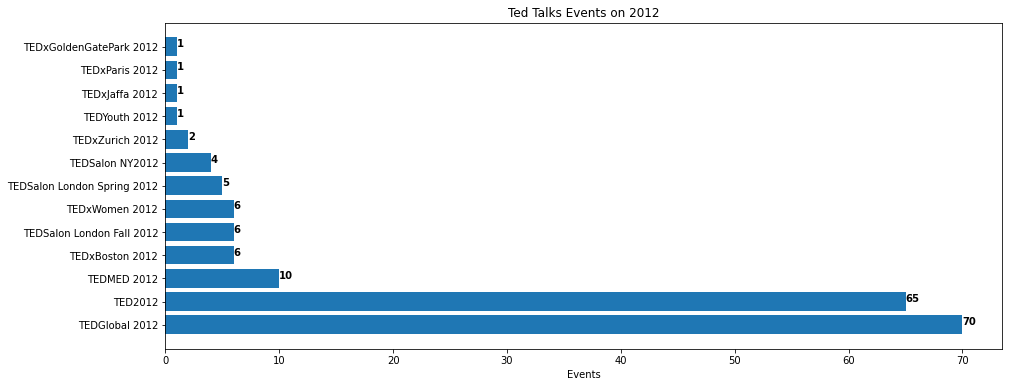

Total number of videos published on Ted Talks events with 2012 labelling:  178


In [17]:
events = df['event'].value_counts().sort_values(ascending=False)
event_2012 = [(i,v) for i,v in events.iteritems() if('2012' in i)]

event_2012_tag = [tag[0] for tag in event_2012]
event_2012_val = [val[1] for val in event_2012]

fig, ax = plt.subplots(figsize=(15,6))
plt.barh(event_2012_tag,event_2012_val)
plt.xlabel('Events')
for i, v in enumerate(event_2012_val):
    ax.text(v,i, str(v),color='black',fontweight='bold')
plt.title('Ted Talks Events on 2012')
plt.show()

print('Total number of videos published on Ted Talks events with 2012 labelling: ',sum(val for val in event_2012_val))

As we go deeper into Ted Talks events with 2012 label, there are only 178 published videos instead of 306 published videos.<br>
'TED2012' and 'TEDGlobal 2012' have most of the videos published (135 videos) among the 178 published videos. 

### What is the top 10 common tags used in Ted Talks?

In [18]:
# What is the top 10 common tags in ted talks
flat_list=[]
for index, row in df.iterrows():
    tag = ast.literal_eval(row['tags'])
    for item in tag:
        flat_list.append(item)

tag_count = Counter(flat_list)
print('Total types of tags:',len(tag_count))

Total types of tags: 416


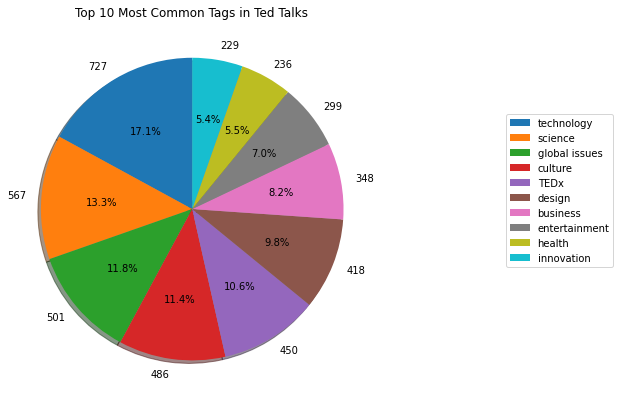

In [19]:
tag_cat = [tag[0] for tag in tag_count.most_common(10)]
tag_val = [tag[1] for tag in tag_count.most_common(10)]

fig, ax = plt.subplots()
plt.pie(tag_val, labels=tag_val, autopct='%1.1f%%', shadow=True, startangle=90)
ax.axis('equal') 
plt.title('Top 10 Most Common Tags in Ted Talks')
plt.legend(tag_cat,bbox_to_anchor=(1.5,1), fontsize=10, bbox_transform=plt.gcf().transFigure)
plt.subplots_adjust(bottom=0, top=1.3)
plt.show()

Among 416 tags, the top 10 most common tags used in Ted Talks videos are technology, science, global issues, culture, TEDx, design, business, entertainment, health, and innovation. Well, it fits with the TED(technology, entertainment, and design) main theme.

### Which Ted Talks tag categories viewed most by audiences?

In [21]:
#Which tag viewed most by audiences
tag_cat_view = []
for tag in tag_count:
    view_counts = 0
    for i in range(len(df)):
        #Match the token
        if(re.search("'"+tag+"'",df['tags'][i])):
            view_counts = view_counts + df['views'][i]
    #Append into list for visualization
    tag_cat_view.append((tag,view_counts))
    
# Sort it in descending order
tag_cat_view.sort(key=lambda x:x[1], reverse=True)

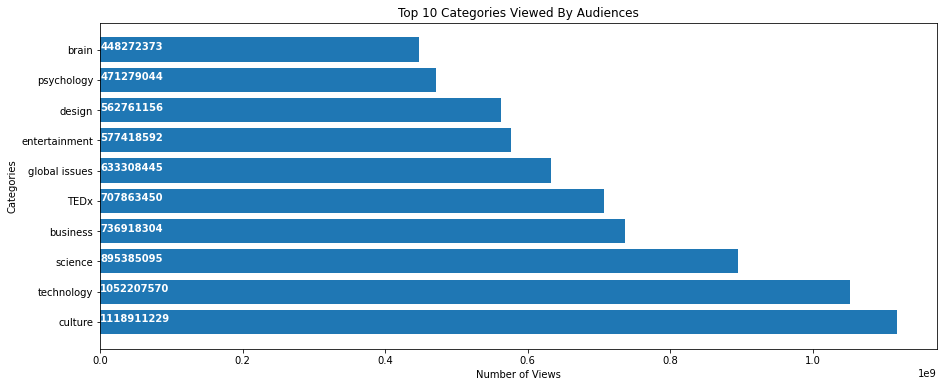

In [22]:
tag_cat_view_cat = [x[0] for x in tag_cat_view[:10]]
tag_cat_view_view = [x[1] for x in tag_cat_view[:10]] 

fig,ax=plt.subplots(figsize=(15,6))
plt.barh(tag_cat_view_cat, tag_cat_view_view)
for i, v in enumerate(tag_cat_view_view):
    ax.text(v/v,i, str(v),color='white',fontweight='bold')
plt.xticks(rotation=0)
plt.ylabel('Categories')
plt.xlabel('Number of Views')
plt.title('Top 10 Categories Viewed By Audiences')
plt.show()

Culture, technology, and science tags videos received most views by audiences.<br>
To improve the views of their Ted Talks videos, speakers should present more ideas about culture, technology and science.

### Which speakers gave the most Ted Talks?

In [23]:
# Who gave the most ted talks
df_most_active_speaker = df.groupby(['main_speaker','speaker_occupation']).agg(
    counts=('speaker_occupation', 'count'), average_views=('views','mean')).reset_index(
).sort_values(by='counts',ascending=False)
print(df_most_active_speaker[df_most_active_speaker['counts'] >= 5])

              main_speaker  ... average_views
768           Hans Rosling  ...  3.063014e+06
1065         Juan Enriquez  ...  1.794195e+06
1277         Marco Tempest  ...  2.226157e+06
1692                 Rives  ...  1.664777e+06
849   Jacqueline Novogratz  ...  7.564852e+05
396            Clay Shirky  ...  1.250086e+06
248             Bill Gates  ...  2.655084e+06
423             Dan Ariely  ...  3.147546e+06
1074       Julian Treasure  ...  6.185532e+06
1487   Nicholas Negroponte  ...  7.943818e+05

[10 rows x 4 columns]


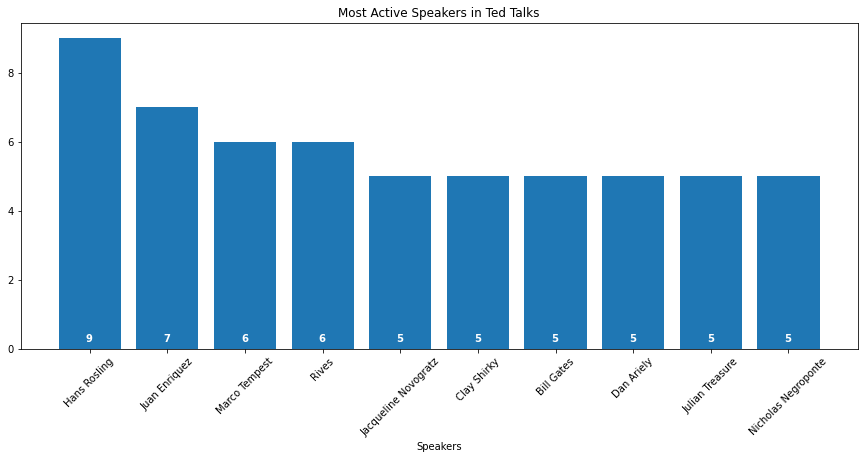

In [24]:
top_5_active_speaker = df_most_active_speaker[df_most_active_speaker['counts'] >= 5]
fig,ax=plt.subplots(figsize=(15,6))
plt.bar(top_5_active_speaker['main_speaker'], top_5_active_speaker['counts'])
for i, v in enumerate(top_5_active_speaker['counts']):
    ax.text(i-0.05,v/v-0.8, str(v),color='white',fontweight='bold')
plt.xlabel('Speakers')
plt.xticks(rotation=45)
plt.title('Most Active Speakers in Ted Talks')
plt.show()

Hans Rosling given the most Ted Talks (9 times), followed by Juan Enriquez (7 times), and Marco Tempest (6 times) and Rives (6 times)

In [25]:
print(df[df['main_speaker'] == 'Hans Rosling'][['main_speaker','title','tags']])

      main_speaker  ...                                               tags
4     Hans Rosling  ...  ['Africa', 'Asia', 'Google', 'demo', 'economic...
117   Hans Rosling  ...  ['Africa', 'Asia', 'Google', 'economics', 'glo...
447   Hans Rosling  ...  ['AIDS', 'Africa', 'disease', 'global issues',...
502   Hans Rosling  ...  ['Africa', 'Asia', 'data', 'global development...
558   Hans Rosling  ...  ['Asia', 'economics', 'health', 'india', 'stat...
726   Hans Rosling  ...  ['culture', 'data', 'demo', 'global issues', '...
784   Hans Rosling  ...  ['Africa', 'TEDx', 'data', 'global development...
893   Hans Rosling  ...          ['culture', 'data', 'economics', 'women']
1239  Hans Rosling  ...  ['TEDx', 'data', 'global issues', 'population'...

[9 rows x 3 columns]


Most of the Ted Talks given by Hans Rosling revolving around global issues, economics, and health.

### Which speakers have the higher average views of their Ted Talks?

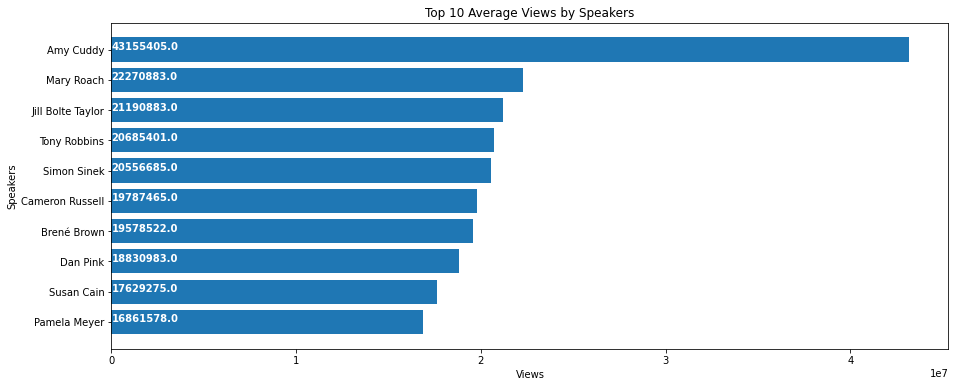

           main_speaker  ... average_views
1531       Pamela Meyer  ...    16861578.0
1954         Susan Cain  ...    17629275.0
438            Dan Pink  ...    18830983.0
273         Brené Brown  ...    19578522.0
302     Cameron Russell  ...    19787465.0
1883        Simon Sinek  ...    20556685.0
2056       Tony Robbins  ...    20685401.0
956   Jill Bolte Taylor  ...    21190883.0
1319         Mary Roach  ...    22270883.0
96            Amy Cuddy  ...    43155405.0

[10 rows x 4 columns]


In [29]:
#Which speakers have higher average views per talk
top_ten_most_average_views_speaker = df_most_active_speaker.sort_values(by='average_views').tail(10)
fig, ax = plt.subplots(figsize=(15,6))
plt.barh(top_ten_most_average_views_speaker['main_speaker'],top_ten_most_average_views_speaker['average_views'])
for i, v in enumerate(top_ten_most_average_views_speaker['average_views']):
    ax.text(v/v, i, str(v), color='white', fontweight='bold')
plt.xlabel('Views')
plt.ylabel('Speakers')
plt.title('Top 10 Average Views by Speakers')
plt.show()

print(top_ten_most_average_views_speaker.tail(10))

Amy Cuddy has the highest average views (43mil) of her Ted Talks, and with just a single talk. 

### Which Ted Talks videos have most views?

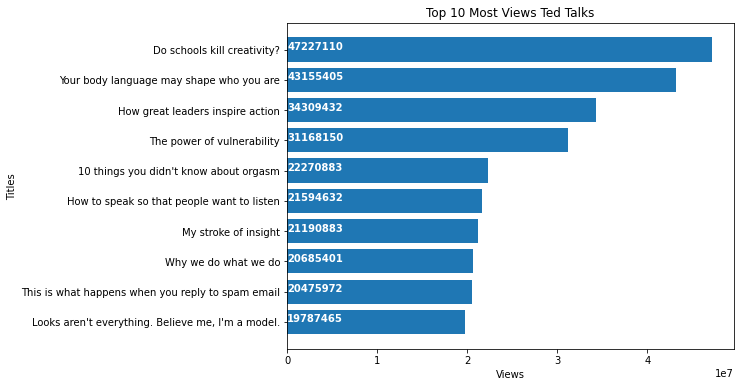

,main_speaker,title,views,published_date
2540,Cameron Russell,"Looks aren't everything. Believe me, I'm a model.",19787465,2013-01-16
2541,James Veitch,This is what happens when you reply to spam email,20475972,2016-01-08
2542,Tony Robbins,Why we do what we do,20685401,2006-06-27
2543,Jill Bolte Taylor,My stroke of insight,21190883,2008-03-12
2544,Julian Treasure,How to speak so that people want to listen,21594632,2014-06-27
2545,Mary Roach,10 things you didn't know about orgasm,22270883,2009-05-20
2546,Brené Brown,The power of vulnerability,31168150,2010-12-23
2547,Simon Sinek,How great leaders inspire action,34309432,2010-05-04
2548,Amy Cuddy,Your body language may shape who you are,43155405,2012-10-01
2549,Ken Robinson,Do schools kill creativity?,47227110,2006-06-27


In [30]:
#Top 10 up to date most views videos
df_most_views = df[['main_speaker', 'title', 'views','published_date']].sort_values(
    by='views').reset_index(drop=True)

fig, ax = plt.subplots(figsize=(8,6))
plt.barh(df_most_views['title'].tail(10),df_most_views['views'].tail(10))
for i, v in enumerate(df_most_views['views'].tail(10)):
    ax.text(v/v, i, str(v), color='white', fontweight='bold')
plt.title('Top 10 Most Views Ted Talks')
plt.xlabel('Views')
plt.ylabel('Titles')
plt.show()

df_most_views.tail(10)

Ken Robinson with 'Do schools kill creativity?' has the most views in Ted Talks, followed by Amy Cuddy with 'Your body language may shape who you are'.<br>
'Do schools kill creativity?' has been published for a longer time compared to 'Your body language may shape who you are'.<br>

### What are the ratings for each Ted Talks?

Make a copy of main dataframe

In [31]:
df_ext = df.copy()

Get the ratings for each ted talk

In [32]:
for index, row in df.iterrows():
    rates = ast.literal_eval(row['ratings'])
    for item in rates:
        if(index == 0): #to create new column
            df_ext[item['name']] = item['count']
        else:
            df_ext[item['name']][index] = item['count']

df_ext.head(5)        

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,Funny,Beautiful,Ingenious,Courageous,Longwinded,Confusing,Informative,Fascinating,Unconvincing,Persuasive,Jaw-dropping,OK,Obnoxious,Inspiring
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,2006-02-25,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,2006-06-27,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,19645,4573,6073,3253,387,242,7346,10581,300,10704,4439,1174,209,24924
1,265,With the same humor and humanity he exuded in ...,977,TED2006,2006-02-25,43,Al Gore,Al Gore: Averting the climate crisis,1,2006-06-27,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520,544,58,56,139,113,62,443,132,258,268,116,203,131,413
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,2006-02-24,26,David Pogue,David Pogue: Simplicity sells,1,2006-06-27,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292,964,60,183,45,78,27,395,166,104,230,54,146,142,230
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,2006-02-26,35,Majora Carter,Majora Carter: Greening the ghetto,1,2006-06-27,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550,59,291,105,760,53,32,380,132,36,460,230,85,35,1070
4,593,You've never seen data presented like this. Wi...,1190,TED2006,2006-02-22,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,2006-06-27,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869,1390,942,3202,318,110,72,5433,4606,67,2542,3736,248,61,2893


In [33]:
df_ext.columns

Index(['comments', 'description', 'duration', 'event', 'film_date',
       'languages', 'main_speaker', 'name', 'num_speaker', 'published_date',
       'ratings', 'related_talks', 'speaker_occupation', 'tags', 'title',
       'url', 'views', 'Funny', 'Beautiful', 'Ingenious', 'Courageous',
       'Longwinded', 'Confusing', 'Informative', 'Fascinating', 'Unconvincing',
       'Persuasive', 'Jaw-dropping', 'OK', 'Obnoxious', 'Inspiring'],
      dtype='object')

drop 'ratings' column from dataframe, as it has been splitted into multiple columns.

In [34]:
df_ext.drop('ratings',axis=1, inplace=True)

### Which Ted Talks videos received most ratings by audiences?

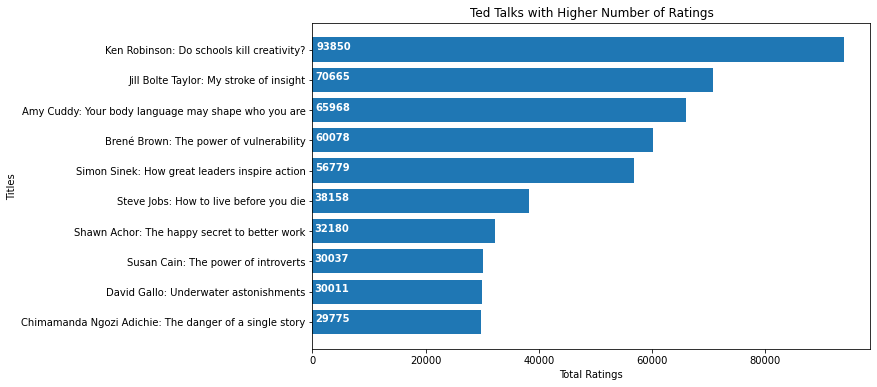

In [35]:
#Which ted talks received higher number of ratings
rating_col = ['Funny', 'Beautiful', 'Ingenious', 'Courageous', 'Longwinded',
       'Confusing', 'Informative', 'Fascinating', 'Unconvincing', 'Persuasive',
       'Jaw-dropping', 'OK', 'Obnoxious', 'Inspiring']

df_ext['sum_ratings'] = df_ext[rating_col].sum(axis=1)

df_ext_sum_rate_sort = df_ext[['name','sum_ratings']].sort_values(by='sum_ratings').reset_index(drop=True)

fig, ax = plt.subplots(figsize=(10,6))
plt.barh(df_ext_sum_rate_sort['name'][-10:],df_ext_sum_rate_sort['sum_ratings'][-10:])
# plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
for i, v in enumerate(df_ext_sum_rate_sort['sum_ratings'][-10:]):
    ax.text(v/df_ext_sum_rate_sort['sum_ratings'][i], i, str(v), color='white', fontweight='bold')
plt.title('Ted Talks with Higher Number of Ratings')
plt.xlabel('Total Ratings')
plt.ylabel('Titles')
plt.show()

'Do schools kill creativity?' with the most views and one of the earliest Ted Talks published received highest number of ratings, which is total of 93850 ratings, followed by 'My stroke of insight' (70665 ratings) and 'Your body language may shape who you are' (65968 ratings). <br>
Although 'My stroke of insight' only has 21mil views compared to 'Do schools kill creativity?'(47mil views) and 'Your body language may shape who you are' (43mil views), but it has the second most highest number of ratings.<br>


### What are the main ratings of Ted Talks videos?

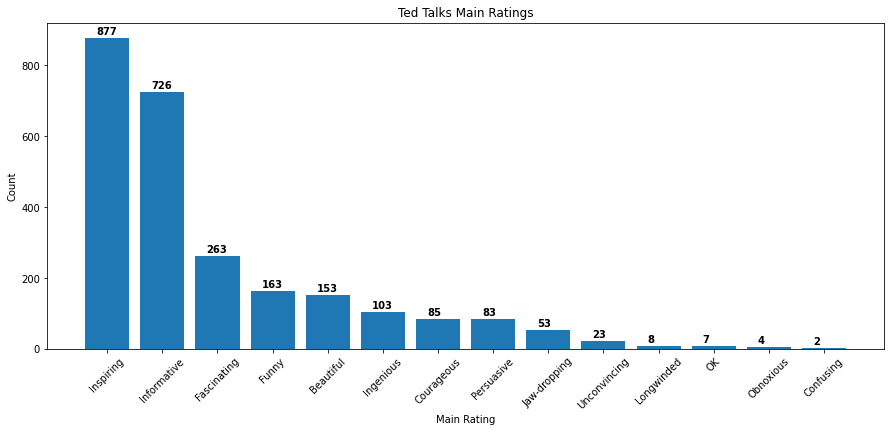

In [36]:
df_ext['main_rating'] = df_ext[rating_col].idxmax(axis=1)

most_rel_rat = df_ext['main_rating'].value_counts()
fig, ax = plt.subplots(figsize=(15,6))
plt.bar(most_rel_rat.index,most_rel_rat.values)
for i, v in enumerate(most_rel_rat):
    ax.text(i-0.2, v+10, str(v), color='black', fontweight='bold')
plt.title('Ted Talks Main Ratings')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.xlabel('Main Rating')
plt.show()

Most of the Ted Talks videos have main rating that show positive, such as inspiring, informative, fasicnating, funny, etc.<br>
However, there are some Ted Talks videos with main rating that show negative, such as unconvincing, longwinded, obnoxious and confusing. <br>
Even though there are nagative main rating of Ted Talks videos, but these videos are just made up a small part. <br>
Hence, Ted Talks is still a good platform for audiences to gain inspiring and informative knowledge.